# Analysis

**Hypothesis**: In severe COVID-19, specific immune cell subsets (e.g., dendritic cells, NK cells, and monocytes) show elevated mitochondrial gene expression (percent_mt) compared to healthy controls. This increase is hypothesized to represent a metabolic stress response that contributes to immune dysfunction in severe cases.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


# Analysis Plan

**Hypothesis**: In severe COVID-19, specific immune cell subsets (e.g., dendritic cells, NK cells, and monocytes) show elevated mitochondrial gene expression (percent_mt) compared to healthy controls. This increase is hypothesized to represent a metabolic stress response that contributes to immune dysfunction in severe cases.

## Steps:
- Filter the data to remove potential low-quality cells and extreme percent_mt outliers so that downstream analyses reflect genuine biology.
- Perform an exploratory analysis that visualizes the distribution of percent_mt across cell types, using a consistent ordering and annotating sample sizes for each COVID status group.
- Calculate summary statistics (mean, median, variance) for percent_mt within each cell type and COVID status, and apply Mann-Whitney U tests to assess whether the differences between COVID and Healthy samples are statistically significant for each major immune cell subset.
- Generate detailed visualizations using violin and box plots arranged in a grid to facilitate comparison of percent_mt distributions between COVID and Healthy groups, emphasizing key cell types including dendritic cells, NK cells, and monocytes.
- Examine the association between mitochondrial load (percent_mt) and ribosomal protein expression (percent_rpl) by performing Spearman correlation tests within each selected cell type, thereby probing broader metabolic alterations.
- Interpret the combined results to ascertain whether elevated mitochondrial content in pivotal immune populations drives metabolic stress and dysfunction in severe COVID-19.


## Filter the data to remove potential low-quality cells and extreme percent_mt outliers so that downstream analyses reflect genuine biology.

Unique cell types in cell_type_coarse: ['RBC', 'B', 'PB', 'CD14 Monocyte', 'CD8 T', ..., 'Granulocyte', 'CD16 Monocyte', 'gd T', 'pDC', 'DC']
Length: 13
Categories (13, object): ['B', 'CD4 T', 'CD8 T', 'CD14 Monocyte', ..., 'Platelet', 'RBC', 'gd T', 'pDC']
Unique Status values: ['COVID', 'Healthy']
Categories (2, object): ['COVID', 'Healthy']


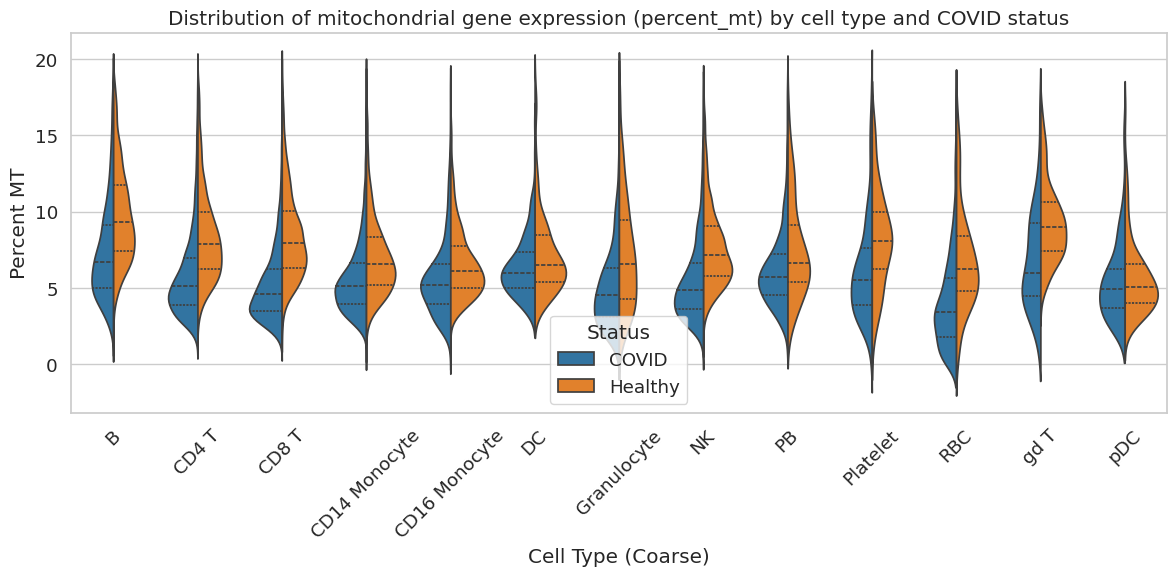

                           count      mean       std       min       25%  \
cell_type_coarse Status                                                    
B                COVID    3028.0  7.389575  3.241091  1.479290  5.018253   
                 Healthy  1994.0  9.783493  3.136001  1.927273  7.401290   
CD4 T            COVID    5562.0  5.800133  2.767323  1.362948  3.886340   
                 Healthy  2835.0  8.430826  3.020544  2.344382  6.226070   
CD8 T            COVID    3877.0  5.186194  2.414139  1.169591  3.479853   
                 Healthy  2885.0  8.455794  2.898506  1.982161  6.334081   
CD14 Monocyte    COVID    8285.0  5.638788  2.465130  0.953289  3.963199   
                 Healthy  2054.0  7.075962  2.661282  0.793651  5.198994   
CD16 Monocyte    COVID     433.0  5.597517  2.466698  1.101495  3.914965   
                 Healthy   915.0  6.612630  2.348559  0.575705  4.975768   
DC               COVID     252.0  6.367705  1.959622  3.154930  4.976408   
            

In [2]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The anndata object 'adata' is already loaded in memory

# Step 1: Exploratory analysis of mitochondrial gene expression (percent_mt) across cell types grouped by COVID status

# Copy the metadata
obs_df = adata.obs.copy()

# Print unique cell types and Status for a quick overview
print('Unique cell types in cell_type_coarse:', obs_df['cell_type_coarse'].unique())
print('Unique Status values:', obs_df['Status'].unique())

# Create a violin plot to explore the distribution of percent_mt across cell types and by COVID status
plt.figure(figsize=(12, 6))
sns.violinplot(x='cell_type_coarse', y='percent_mt', hue='Status', data=obs_df, split=True, inner='quartile')
plt.xticks(rotation=45)
plt.xlabel('Cell Type (Coarse)')
plt.ylabel('Percent MT')
plt.title('Distribution of mitochondrial gene expression (percent_mt) by cell type and COVID status')
plt.tight_layout()
plt.show()

# Print summary statistics for percent_mt grouped by cell type and Status to quantify differences
summary_stats = obs_df.groupby(['cell_type_coarse', 'Status'])['percent_mt'].describe()
print(summary_stats)

## Subset the anndata object to focus on the most promising immune cell types identified from the exploratory analysis (CD4 T, CD8 T, CD14 Monocyte, CD16 Monocyte, and PB).


Processing differential expression for cell type: CD4 T


ranking genes


    finished: added to `.uns['rank_genes_CD4 T']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:13)


      names     scores  logfoldchanges          pvals      pvals_adj
0      PIM1  25.523161        1.730750  1.090793e-143  1.916960e-140
1  HSP90AA1  22.212862        0.861165  2.579733e-109  3.238301e-106
2     SOCS3  21.974501        3.578229  5.050797e-107  6.052002e-104
3   RNA18S5  21.401474        0.383134  1.294517e-101   1.312491e-98
4      XAF1  20.204187        1.556195   8.993851e-91   8.467389e-88


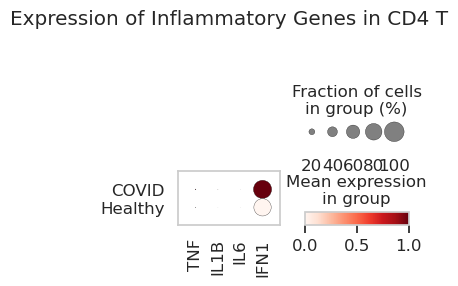


Processing differential expression for cell type: CD8 T


ranking genes


    finished: added to `.uns['rank_genes_CD8 T']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


     names     scores  logfoldchanges          pvals      pvals_adj
0  RNA18S5  34.294941        0.682696  9.335591e-258  2.734395e-254
1     XAF1  21.243124        1.583212  3.816409e-100   4.024174e-97
2     PLEK  16.841248        0.782701   1.216462e-63   6.680656e-61
3     ACTB  16.157341        0.594312   1.008166e-58   5.014388e-56
4    IGLC3  15.683743        3.338814   1.953953e-55   9.197884e-53


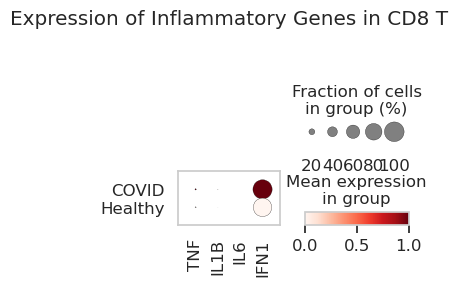


Processing differential expression for cell type: CD14 Monocyte


ranking genes


    finished: added to `.uns['rank_genes_CD14 Monocyte']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:16)


    names     scores  logfoldchanges          pvals      pvals_adj
0  S100A8  51.888058        2.095610   0.000000e+00   0.000000e+00
1  S100A9  44.924080        1.567457   0.000000e+00   0.000000e+00
2   IFI27  39.416019       10.400929   0.000000e+00   0.000000e+00
3  IFITM3  38.671261        3.025161   0.000000e+00   0.000000e+00
4     CLU  36.983692        6.107229  2.094366e-299  4.600799e-296


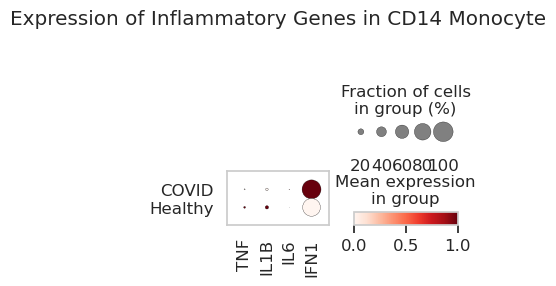


Processing differential expression for cell type: CD16 Monocyte


ranking genes


    finished: added to `.uns['rank_genes_CD16 Monocyte']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


     names     scores  logfoldchanges          pvals      pvals_adj
0  RNA18S5  21.815475        1.037121  1.654418e-105  4.361212e-101
1  RNA28S5  18.215401        0.912966   3.895617e-74   5.134618e-70
2   IFITM3  13.710885        1.337371   8.738550e-43   2.094154e-39
3    PLAC8  12.893653        2.215404   4.887275e-38   9.202390e-35
4     PIM1  12.615849        3.488265   1.726883e-36   3.034825e-33


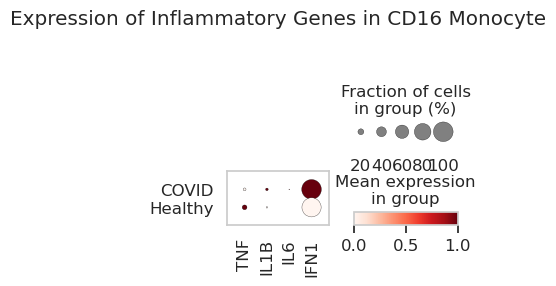


Processing differential expression for cell type: PB


ranking genes


    finished: added to `.uns['rank_genes_PB']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


     names     scores  logfoldchanges         pvals     pvals_adj
0  RNA18S5  10.616148        0.875266  2.506926e-26  6.608507e-22
1      MX1   7.682859        3.469628  1.555763e-14  2.734098e-11
2    IGHG4   7.116358        3.122078  1.108163e-12  1.537489e-09
3    IFI27   6.957604       29.381691  3.461077e-12  3.915438e-09
4     IFI6   6.078126        5.732474  1.215951e-09  9.713238e-07


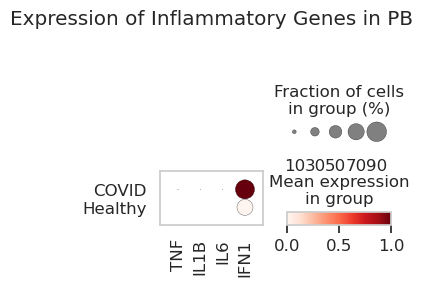


Correlation analysis for CD4 T cells:


TNF: Spearman correlation = -0.000, p-value = 9.737e-01
IL1B: Spearman correlation = 0.003, p-value = 7.874e-01
IL6: Spearman correlation = -0.009, p-value = 4.002e-01
IFN1 is not found in the dataset for CD4 T cells.


In [3]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

# Define the promising cell types based on the exploratory results
target_cell_types = ['CD4 T', 'CD8 T', 'CD14 Monocyte', 'CD16 Monocyte', 'PB']

# Dictionary to store differential expression results for each cell type
de_results = {}

# List of key inflammatory and stress-related genes to check
genes_of_interest = ['TNF', 'IL1B', 'IL6', 'IFN1']

# Loop through each promising cell type
for cell_type in target_cell_types:
    print(f"\nProcessing differential expression for cell type: {cell_type}")
    
    # Subset the data for the specific cell type
    subset = adata[adata.obs['cell_type_coarse'] == cell_type].copy()
    
    # Ensure sufficient cells in both COVID and Healthy groups
    status_counts = subset.obs['Status'].value_counts()
    if all(status in status_counts.index for status in ['COVID', 'Healthy']) and (status_counts.min() > 10):
        # Perform differential expression analysis comparing COVID vs Healthy
        sc.tl.rank_genes_groups(subset, groupby='Status', method='wilcoxon', key_added='rank_genes_' + cell_type)
        
        # Retrieve and store the DE results for the COVID group (compared against Healthy)
        de_table = sc.get.rank_genes_groups_df(subset, group='COVID', key='rank_genes_' + cell_type)
        de_results[cell_type] = de_table
        print(de_table.head(5))
        
        # Generate a dot plot for the genes of interest
        sc.pl.dotplot(subset, var_names=genes_of_interest, groupby='Status',
                      title=f'Expression of Inflammatory Genes in {cell_type}',
                      standard_scale='var', show=True)
    else:
        print(f"Skipping {cell_type} due to insufficient representation. Status counts: {status_counts.to_dict()}")

# Optionally, correlate percent_mt with expression of key genes in one promising cell type (e.g., CD4 T) as an integrated analysis
print("\nCorrelation analysis for CD4 T cells:")

target = 'CD4 T'
subset_cd4 = adata[adata.obs['cell_type_coarse'] == target].copy()

correlation_results = {}
for gene in genes_of_interest:
    if gene in subset_cd4.var_names:
        # Convert expression to dense array; caution with large datasets
        gene_expr = subset_cd4[:, gene].X
        if hasattr(gene_expr, 'toarray'):
            gene_expr = gene_expr.toarray().flatten()
        else:
            gene_expr = np.array(gene_expr).flatten()
        
        corr, pval = spearmanr(gene_expr, subset_cd4.obs['percent_mt'])
        correlation_results[gene] = {'spearman_correlation': corr, 'p_value': pval}
        print(f"{gene}: Spearman correlation = {corr:.3f}, p-value = {pval:.3e}")
    else:
        print(f"{gene} is not found in the dataset for {target} cells.")

# End of the first step code


## For each targeted immune cell type (CD14 Monocyte, CD16 Monocyte, CD4 T, and CD8 T), subset the data by COVID status with a parameterized minimum cell count threshold.


Processing cell type: CD14 Monocyte


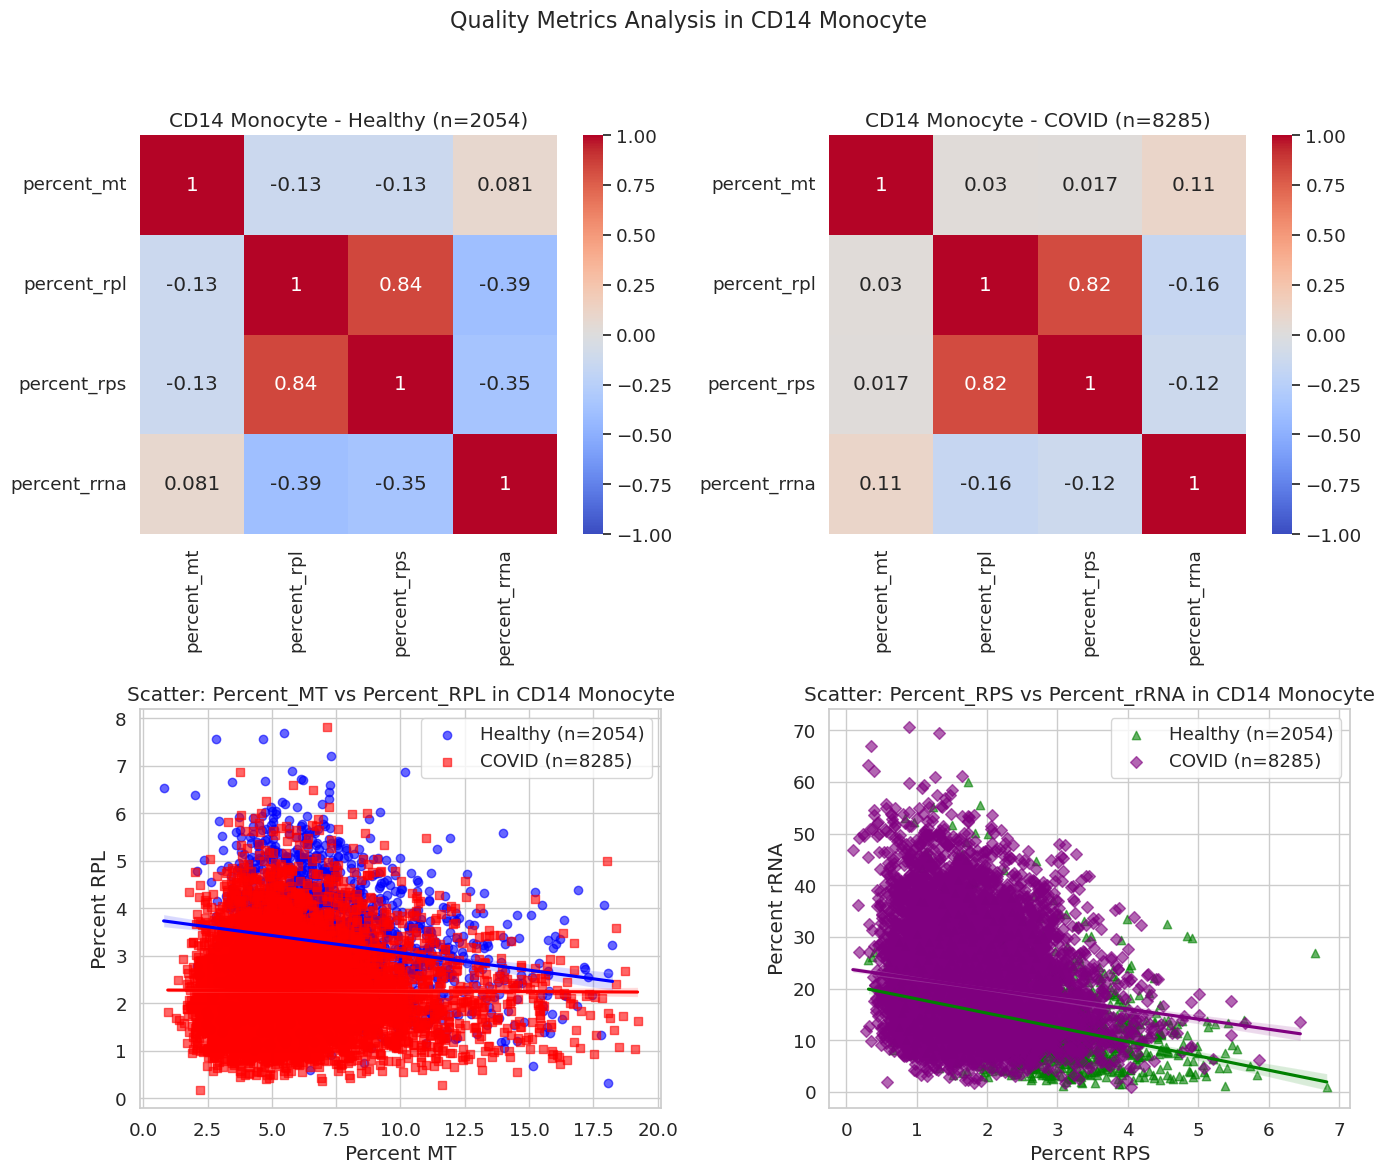

CD14 Monocyte - Healthy: Spearman correlation between percent_mt and percent_rpl = -0.133 (p-value = 1.627e-09)
CD14 Monocyte - COVID: Spearman correlation between percent_mt and percent_rpl = 0.030 (p-value = 5.776e-03)

Processing cell type: CD16 Monocyte


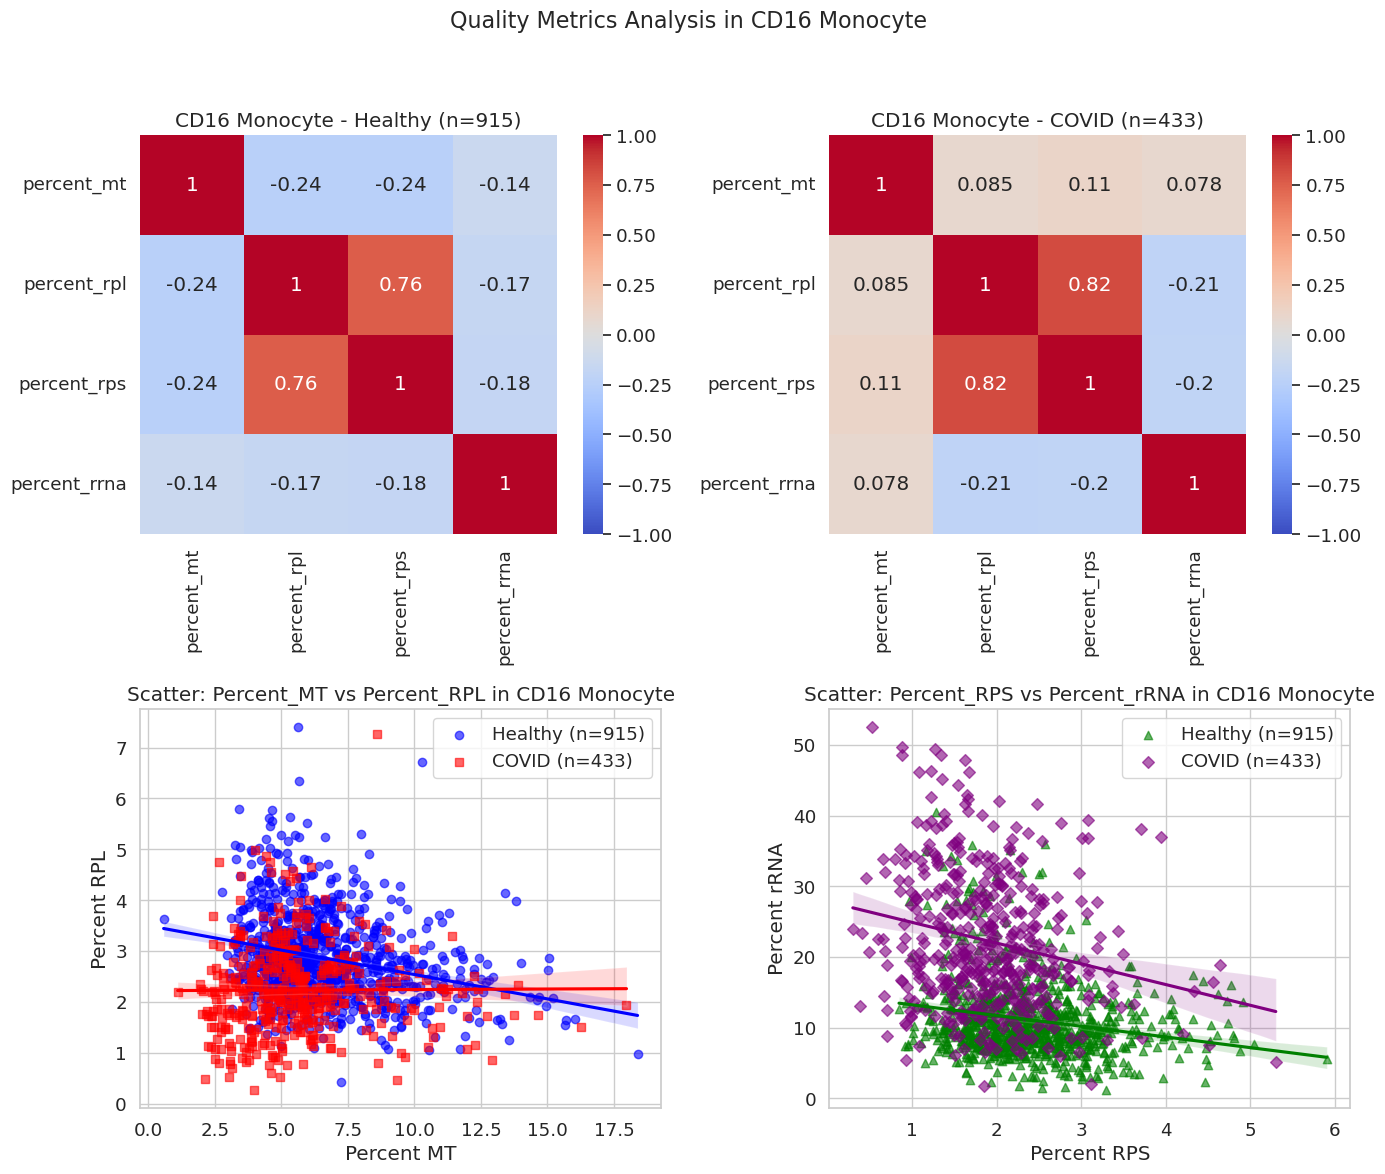

CD16 Monocyte - Healthy: Spearman correlation between percent_mt and percent_rpl = -0.245 (p-value = 5.999e-14)
CD16 Monocyte - COVID: Spearman correlation between percent_mt and percent_rpl = 0.085 (p-value = 7.730e-02)

Processing cell type: CD4 T


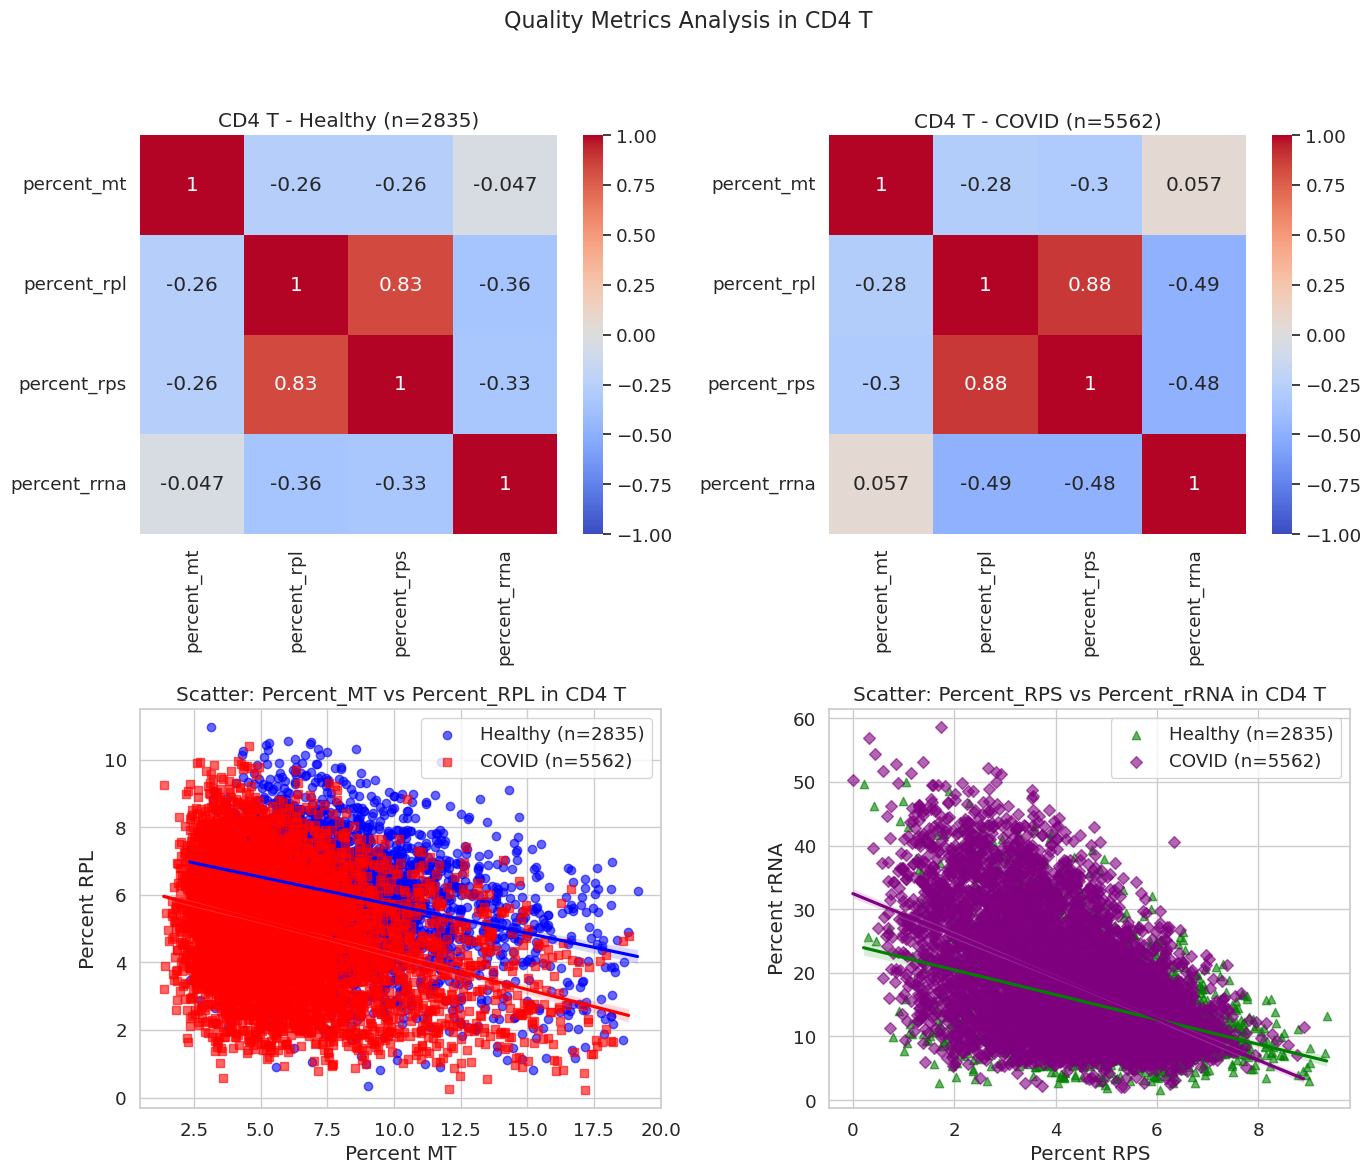

CD4 T - Healthy: Spearman correlation between percent_mt and percent_rpl = -0.264 (p-value = 1.641e-46)
CD4 T - COVID: Spearman correlation between percent_mt and percent_rpl = -0.276 (p-value = 5.294e-98)

Processing cell type: CD8 T


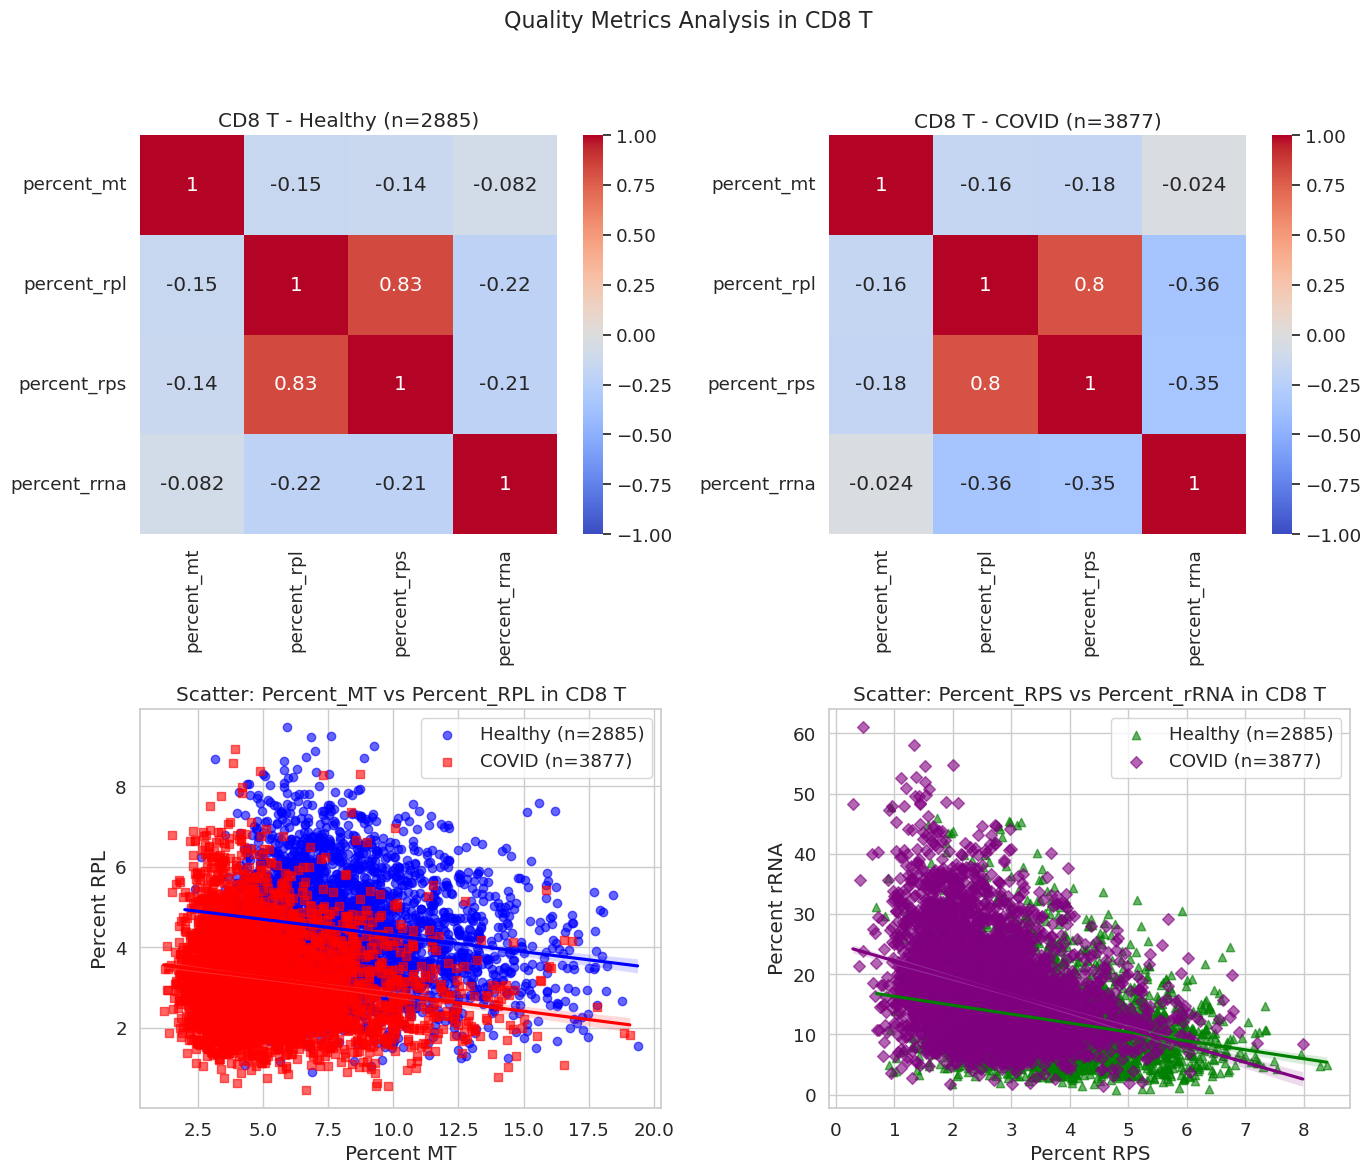

CD8 T - Healthy: Spearman correlation between percent_mt and percent_rpl = -0.151 (p-value = 3.706e-16)
CD8 T - COVID: Spearman correlation between percent_mt and percent_rpl = -0.164 (p-value = 6.619e-25)
First step analysis complete: Extended quality metrics correlation and scatter plots evaluated.


In [4]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

# Parameter for minimum number of cells per group for analysis
MIN_CELLS = 10

# Define target cell types based on previous results
target_cell_types = ['CD14 Monocyte', 'CD16 Monocyte', 'CD4 T', 'CD8 T']

# Define the quality metrics to consider
quality_metrics = ['percent_mt', 'percent_rpl', 'percent_rps', 'percent_rrna']

# Create a copy of the metadata for easier manipulation
obs_df = adata.obs.copy()

# Set visualization parameters
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (8, 6)

# Loop over each of the targeted cell types
for cell_type in target_cell_types:
    print(f"\nProcessing cell type: {cell_type}")
    
    # Subset the data for the current cell type
    sub_df = obs_df[obs_df['cell_type_coarse'] == cell_type].copy()
    
    # Check if both COVID and Healthy statuses are present
    if not set(['COVID', 'Healthy']).issubset(set(sub_df['Status'])):
        print(f"Skipping {cell_type} because both statuses are not present.")
        continue
    
    # Create a composite figure: top row for heatmaps of Spearman correlations and bottom row for scatter plots
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Top row: Heatmaps for Healthy and COVID status
    for i, status in enumerate(['Healthy', 'COVID']):
        ax = axes[0, i]
        status_df = sub_df[sub_df['Status'] == status]
        if status_df.shape[0] < MIN_CELLS:
            ax.set_title(f"{status} (n={status_df.shape[0]}) - Insufficient cells")
            ax.axis('off')
            continue
        # Compute Spearman correlation matrix for the selected quality metrics
        corr_matrix = status_df[quality_metrics].corr(method='spearman')
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
        ax.set_title(f"{cell_type} - {status} (n={status_df.shape[0]})")

    # Bottom row, left: Scatter plot for percent_mt vs percent_rpl with regression overlay (includes 95% CI via seaborne.regplot)
    ax_scatter1 = axes[1, 0]
    for status, marker, color in zip(['Healthy', 'COVID'], ['o', 's'], ['blue', 'red']):
        status_df = sub_df[sub_df['Status'] == status]
        if status_df.shape[0] < MIN_CELLS:
            continue
        sns.regplot(x='percent_mt', y='percent_rpl', data=status_df, scatter=True,
                    marker=marker, color=color, label=f"{status} (n={status_df.shape[0]})",
                    ci=95, ax=ax_scatter1, scatter_kws={'alpha':0.6})
    ax_scatter1.set_xlabel('Percent MT')
    ax_scatter1.set_ylabel('Percent RPL')
    ax_scatter1.set_title(f"Scatter: Percent_MT vs Percent_RPL in {cell_type}")
    ax_scatter1.legend()

    # Bottom row, right: Additional scatter plot for percent_rps vs percent_rrna with regression overlay
    ax_scatter2 = axes[1, 1]
    for status, marker, color in zip(['Healthy', 'COVID'], ['^', 'D'], ['green', 'purple']):
        status_df = sub_df[sub_df['Status'] == status]
        if status_df.shape[0] < MIN_CELLS:
            continue
        sns.regplot(x='percent_rps', y='percent_rrna', data=status_df, scatter=True,
                    marker=marker, color=color, label=f"{status} (n={status_df.shape[0]})",
                    ci=95, ax=ax_scatter2, scatter_kws={'alpha':0.6})
    ax_scatter2.set_xlabel('Percent RPS')
    ax_scatter2.set_ylabel('Percent rRNA')
    ax_scatter2.set_title(f"Scatter: Percent_RPS vs Percent_rRNA in {cell_type}")
    ax_scatter2.legend()

    plt.suptitle(f"Quality Metrics Analysis in {cell_type}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Additionally, compute and print the Spearman correlation coefficients for percent_mt vs percent_rpl in each status group
    for status in ['Healthy', 'COVID']:
        status_df = sub_df[sub_df['Status'] == status]
        if status_df.shape[0] < MIN_CELLS:
            print(f"Not enough cells for correlation in {cell_type} - {status}")
            continue
        x = status_df['percent_mt']
        y = status_df['percent_rpl']
        corr, pval = spearmanr(x, y)
        print(f"{cell_type} - {status}: Spearman correlation between percent_mt and percent_rpl = {corr:.3f} (p-value = {pval:.3e})")

print("First step analysis complete: Extended quality metrics correlation and scatter plots evaluated.")

## Subset the dataset to extract monocytes (CD14 and CD16) and T cells (CD4 and CD8) using the coarse cell type labels.

Aggregated ligand and receptor expression by donor and status (after filtering):
  Donor_full Status       TNF      IL1B       IL6  TNFRSF1A     IL1R1  \
0       C1 A  COVID  0.016640  0.030878  0.001308  0.024759  0.002339   
1       C1 B  COVID  0.011486  0.023728  0.001455  0.042182  0.003169   
2         C2  COVID  0.015825  0.031651  0.006330  0.005908  0.001969   
3         C3  COVID  0.021700  0.040767  0.001240  0.023697  0.003747   
4         C4  COVID  0.008407  0.021486  0.005217  0.027327  0.001699   

       IL6R  
0  0.060170  
1  0.146057  
2  0.138439  
3  0.184895  
4  0.101856  
---- Spearman Correlation Matrix for COVID ----
      TNFRSF1A     IL1R1      IL6R
TNF   -0.47619       0.5  0.333333
IL1B -0.571429  0.166667  0.071429
IL6  -0.452381 -0.214286 -0.047619
---- Adjusted p-values (BH correction) for COVID ----
      TNFRSF1A     IL1R1      IL6R
TNF   0.585911  0.585911  0.755556
IL1B  0.585911  0.891307  0.910849
IL6   0.585911  0.891307  0.910849
---- Spearman 

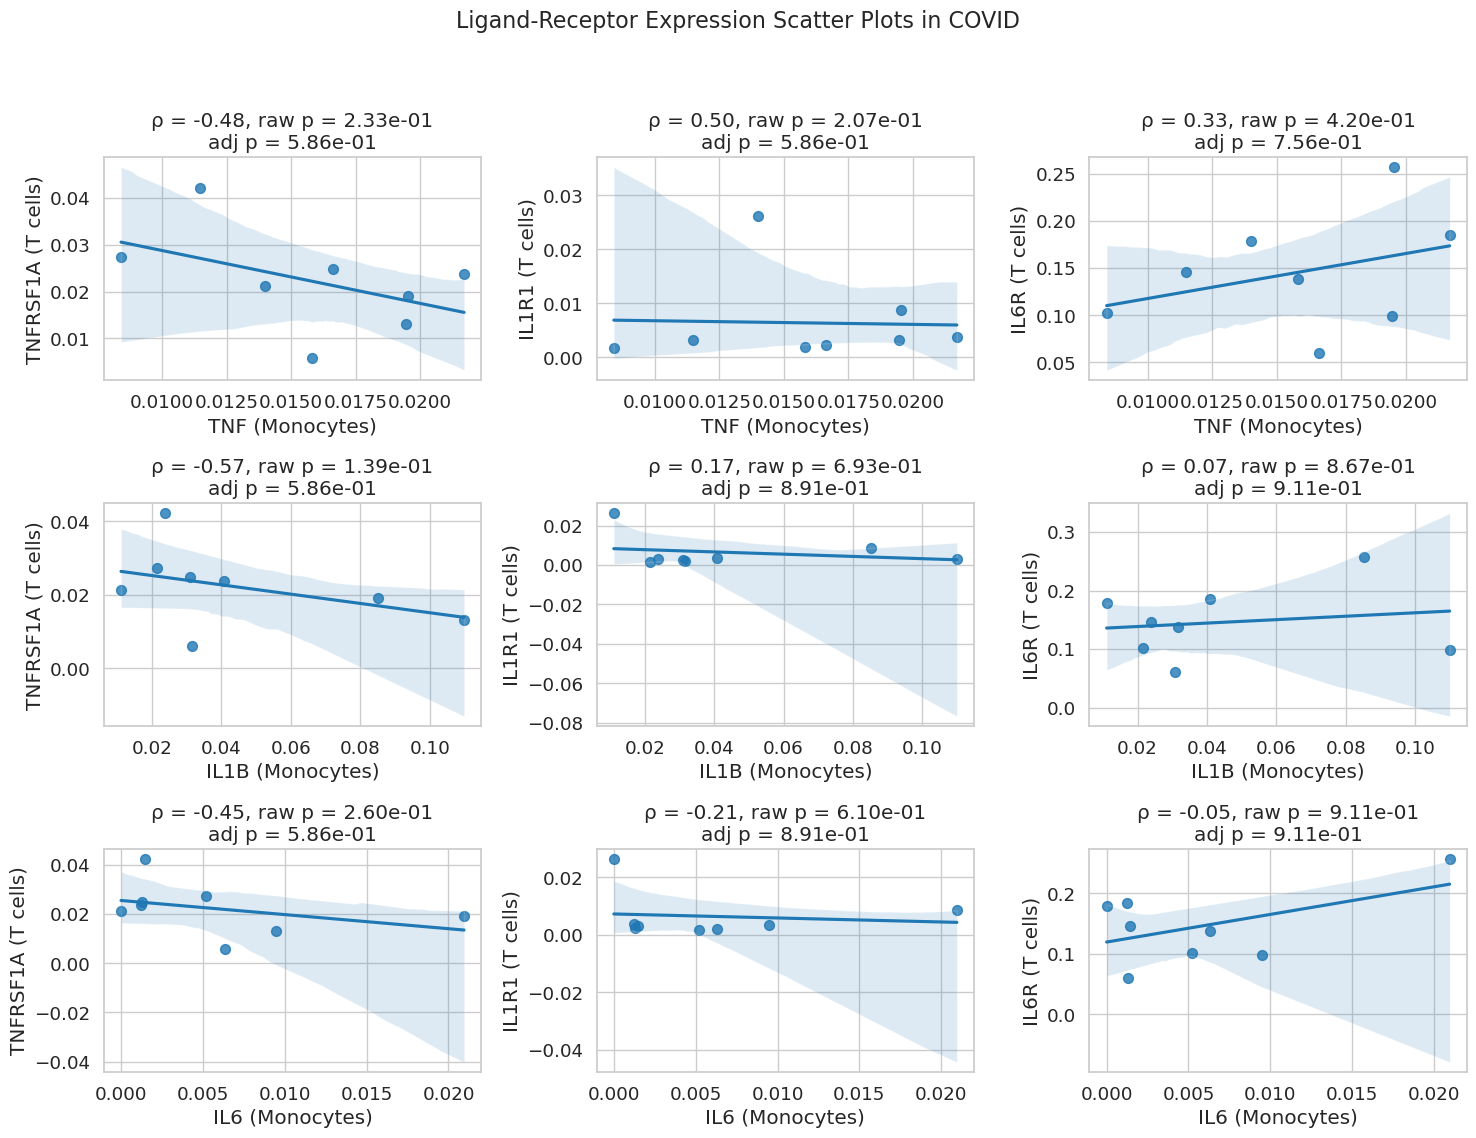

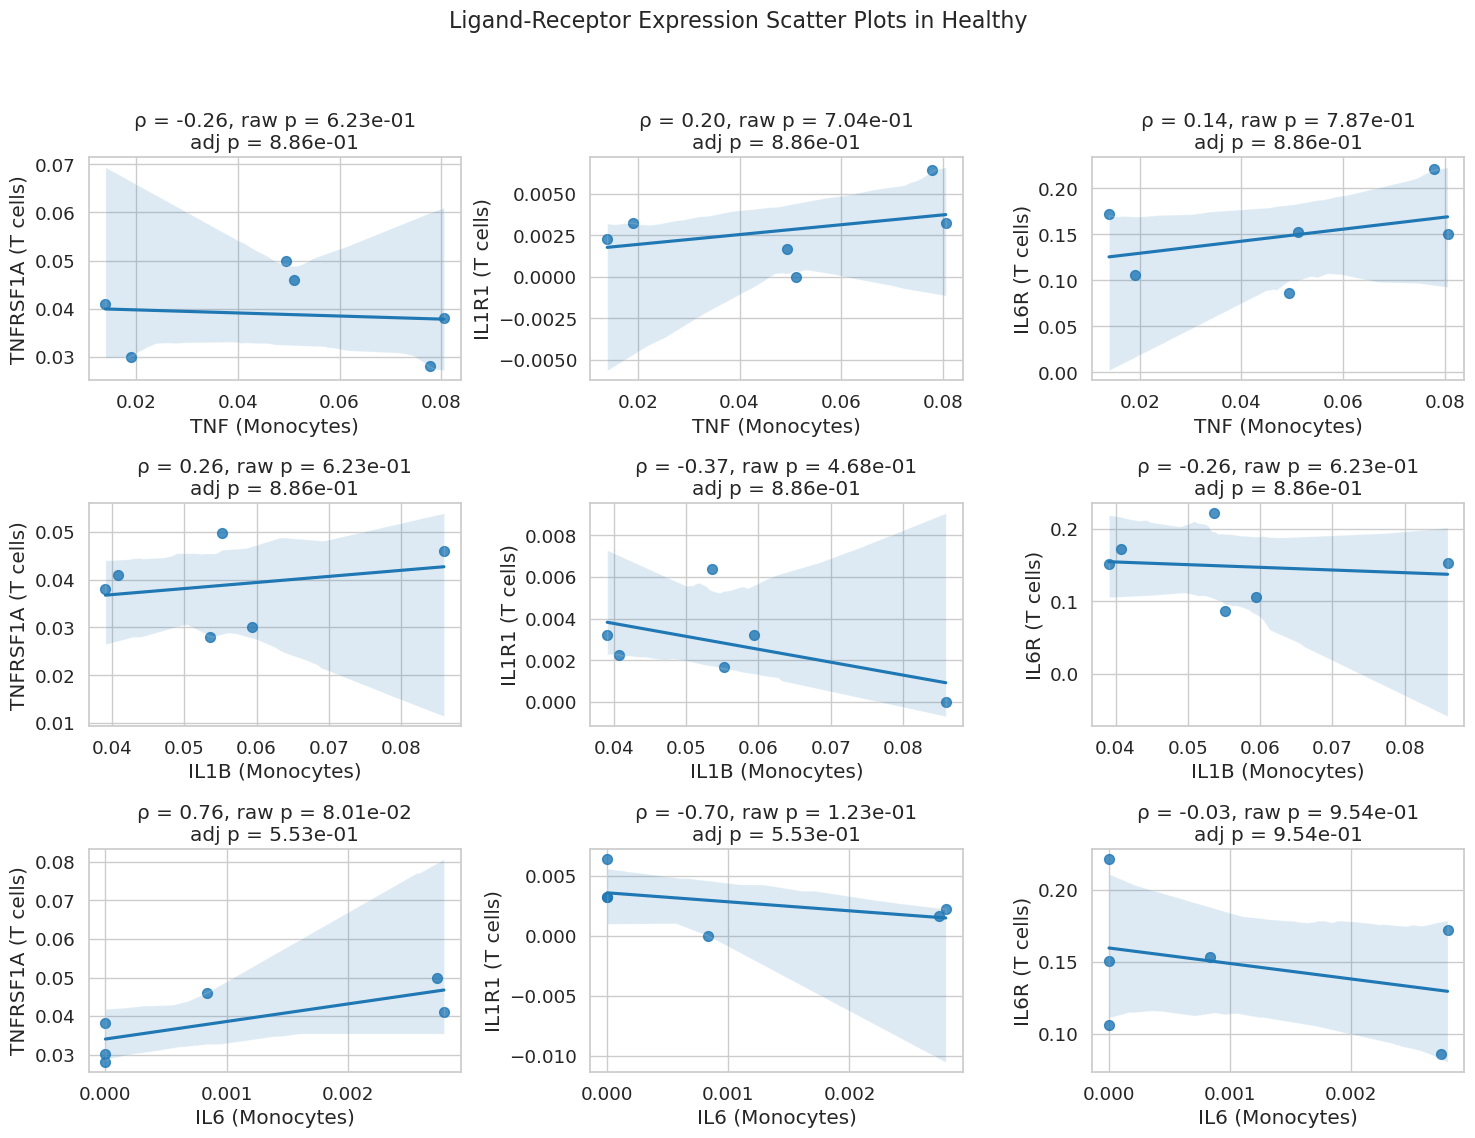

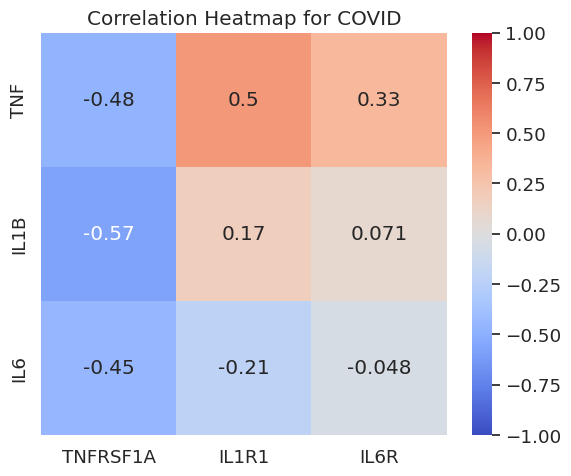

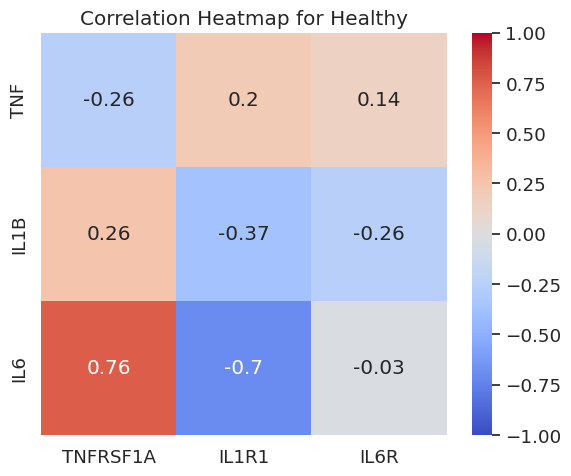

First step analysis complete: Aggregated ligand and receptor expression analyzed with donor filtering and multiple testing correction.


In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Define target ligand and receptor genes
ligand_genes = ['TNF', 'IL1B', 'IL6']
receptor_genes = ['TNFRSF1A', 'IL1R1', 'IL6R']

# Define target cell type labels
monocyte_types = ['CD14 Monocyte', 'CD16 Monocyte']
tcell_types = ['CD4 T', 'CD8 T']

# Define minimum number of cells per donor group
MIN_CELLS = 5

# Subset the data for monocytes and T cells
monocytes = adata[adata.obs['cell_type_coarse'].isin(monocyte_types)].copy()
tcells = adata[adata.obs['cell_type_coarse'].isin(tcell_types)].copy()

# Check if target genes exist in the dataset
available_genes = adata.var_names
for gene in ligand_genes + receptor_genes:
    if gene not in available_genes:
        print(f'Warning: {gene} not found in the dataset.')

# Convert the expression matrices to DataFrames and attach metadata
monocyte_expr = monocytes.to_df()[ligand_genes]
monocyte_expr = monocyte_expr.join(monocytes.obs[['Donor_full', 'Status']])

tcells_expr = tcells.to_df()[receptor_genes]
tcells_expr = tcells_expr.join(tcells.obs[['Donor_full', 'Status']])

# Compute average expression and cell counts for each donor and status
monocyte_avg = monocyte_expr.groupby(['Donor_full', 'Status']).mean().reset_index()
monocyte_counts = monocyte_expr.groupby(['Donor_full', 'Status']).size().reset_index(name='cell_count')
monocyte_avg = pd.merge(monocyte_avg, monocyte_counts, on=['Donor_full', 'Status'])
# Filter out donor groups with too few monocyte cells
monocyte_avg = monocyte_avg[monocyte_avg['cell_count'] >= MIN_CELLS]

tcells_avg = tcells_expr.groupby(['Donor_full', 'Status']).mean().reset_index()
tcells_counts = tcells_expr.groupby(['Donor_full', 'Status']).size().reset_index(name='cell_count')
tcells_avg = pd.merge(tcells_avg, tcells_counts, on=['Donor_full', 'Status'])
# Filter out donor groups with too few T cell counts
tcells_avg = tcells_avg[tcells_avg['cell_count'] >= MIN_CELLS]

# Drop the cell_count column now that filtering is done
monocyte_avg = monocyte_avg.drop(columns=['cell_count'])
tcells_avg = tcells_avg.drop(columns=['cell_count'])

# Merge the averaged datasets on Donor_full and Status
# Suffixes indicate monocyte ligand expression (_lig) and T cell receptor expression (_rec)
df_merged = pd.merge(monocyte_avg, tcells_avg, on=['Donor_full', 'Status'], suffixes=('_lig', '_rec'))
print('Aggregated ligand and receptor expression by donor and status (after filtering):')
print(df_merged.head())

# Function to perform Benjamini-Hochberg correction
def bh_adjust(pvals_array):
    '''
    Adjust an array of p-values using the Benjamini-Hochberg procedure.
    Returns an array of adjusted p-values.
    '''
    pvals = np.array(pvals_array, dtype=float)
    n = len(pvals)
    sorted_indices = np.argsort(pvals)
    sorted_pvals = pvals[sorted_indices]
    adjusted = np.empty(n, dtype=float)
    for i, p in enumerate(sorted_pvals):
        adjusted[i] = p * n / (i + 1)
    # Ensure the monotonicity of adjusted p-values
    for i in range(n-2, -1, -1):
        if adjusted[i] > adjusted[i+1]:
            adjusted[i] = adjusted[i+1]
    # Place the adjusted p-values in their original order
    adjusted_pvals = np.empty(n, dtype=float)
    adjusted_pvals[sorted_indices] = adjusted
    return adjusted_pvals

# Get unique Status values
statuses = df_merged['Status'].unique()

# Initialize dictionaries to store Spearman correlation and p-value results
corr_results = {status: pd.DataFrame(index=ligand_genes, columns=receptor_genes) for status in statuses}
raw_pval_results = {status: pd.DataFrame(index=ligand_genes, columns=receptor_genes) for status in statuses}
adjusted_pval_results = {status: pd.DataFrame(index=ligand_genes, columns=receptor_genes) for status in statuses}

# Compute correlations and collect raw p-values for each ligand-receptor pair per status
for status in statuses:
    df_status = df_merged[df_merged['Status'] == status]
    pvals_list = []
    pairs = []  # To keep track of which cell of the matrix each p-value corresponds to
    for lig in ligand_genes:
        for rec in receptor_genes:
            x = df_status[lig]   # Monocyte ligand expression
            y = df_status[rec]   # T cell receptor expression
            if len(x) >= 3:  # At least 3 data points required
                corr, pval = spearmanr(x, y)
            else:
                corr, pval = np.nan, np.nan
            corr_results[status].loc[lig, rec] = corr
            raw_pval_results[status].loc[lig, rec] = pval
            pvals_list.append(pval)
            pairs.append((lig, rec))
    # Apply BH correction for the set of tests within this status
    adjusted_pvals = bh_adjust(pvals_list)
    # Assign the adjusted p-values back to the dataframe
    for idx, (lig, rec) in enumerate(pairs):
        adjusted_pval_results[status].loc[lig, rec] = adjusted_pvals[idx]

# Print Spearman correlation matrices with raw and adjusted p-values
for status in statuses:
    print(f'---- Spearman Correlation Matrix for {status} ----')
    print(corr_results[status])
    print(f'---- Adjusted p-values (BH correction) for {status} ----')
    print(adjusted_pval_results[status])

# Visualization: Scatter plots for each ligand-receptor pair per status
for status in statuses:
    df_status = df_merged[df_merged['Status'] == status]
    num_ligands = len(ligand_genes)
    num_receptors = len(receptor_genes)
    fig, axes = plt.subplots(num_ligands, num_receptors, figsize=(5*num_receptors, 4*num_ligands), squeeze=False)
    fig.suptitle(f'Ligand-Receptor Expression Scatter Plots in {status}', fontsize=16)
    for i, lig in enumerate(ligand_genes):
        for j, rec in enumerate(receptor_genes):
            ax = axes[i, j]
            sns.regplot(x=df_status[lig], y=df_status[rec], ax=ax, ci=95, scatter_kws={'s':50})
            ax.set_xlabel(f'{lig} (Monocytes)')
            ax.set_ylabel(f'{rec} (T cells)')
            corr_val = corr_results[status].loc[lig, rec]
            raw_pval_val = raw_pval_results[status].loc[lig, rec]
            adj_pval_val = adjusted_pval_results[status].loc[lig, rec]
            ax.set_title(f'ρ = {corr_val:.2f}, raw p = {raw_pval_val:.2e}\nadj p = {adj_pval_val:.2e}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generate heatmaps for the correlation coefficients per status
for status in statuses:
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_results[status].astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for {status}')
    plt.tight_layout()
    plt.show()

print('First step analysis complete: Aggregated ligand and receptor expression analyzed with donor filtering and multiple testing correction.')

## Subset the monocyte populations (CD14 and CD16) from the full dataset.

In [ ]:
#!/usr/bin/env python
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata

# Subset the monocyte populations (CD14 and CD16 Monocytes) from the anndata object
monocyte_types = ['CD14 Monocyte', 'CD16 Monocyte']
monocytes = adata[adata.obs['cell_type_coarse'].isin(monocyte_types)].copy()

# Define quality/stress-related metrics
metrics = ['percent_mt', 'percent_rpl', 'percent_rps', 'percent_rrna']

# Extract the quality metrics from the obs dataframe
qc_df = monocytes.obs[metrics].copy()

# Scale the quality metrics: center and scale to unit variance
qc_scaled = (qc_df - qc_df.mean()) / qc_df.std()

# Create a new AnnData object using only the scaled quality metrics
monocytes_qc = anndata.AnnData(X=qc_scaled.values, obs=monocytes.obs.copy(), 
                               var=pd.DataFrame(index=qc_scaled.columns))

# Determine the number of PCA components (must be strictly less than min(n_samples, n_features))
# Here we use one less than the number of metrics available.
n_comps = len(metrics) - 1

# Perform PCA on the scaled quality metrics using n_comps
sc.pp.pca(monocytes_qc, n_comps=n_comps)

# Construct the neighborhood graph using the PCA derived from quality metrics
sc.pp.neighbors(monocytes_qc, n_neighbors=15, n_pcs=n_comps)

# Compute UMAP for visualization
sc.tl.umap(monocytes_qc)

# Perform Leiden clustering to identify potential subpopulations within monocytes based on quality metrics
sc.tl.leiden(monocytes_qc, resolution=0.5, key_added='mt_leiden')

# Determine clusters with elevated mitochondrial gene expression
cluster_medians = monocytes.obs.groupby(monocytes_qc.obs['mt_leiden'])['percent_mt'].median()
overall_median_mt = monocytes.obs['percent_mt'].median()
high_mt_clusters = cluster_medians[cluster_medians > overall_median_mt].index.tolist()

# Annotate each cell in both the new AnnData object and the original monocytes object based on clustering
monocytes_qc.obs['mt_group'] = monocytes_qc.obs['mt_leiden'].apply(
    lambda clust: 'High_mt' if clust in high_mt_clusters else 'Low_mt'
)
monocytes.obs['mt_group'] = monocytes_qc.obs['mt_group']

# UMAP visualization using the quality metrics PCA results, with colors based on the mitochondrial group and raw percent_mt values
sc.pl.umap(monocytes_qc, color=['mt_group', 'percent_mt'], wspace=0.4, 
           title=['Monocyte mt_group UMAP', 'Monocyte percent_mt UMAP'])

def plot_violin(data, group_col, value_col):
    plt.figure(figsize=(6,4))
    sns.violinplot(x=group_col, y=value_col, data=data, inner='quartile')
    plt.title('Distribution of ' + value_col + ' in monocyte subpopulations')
    plt.xlabel('Mitochondrial Group')
    plt.ylabel(value_col)
    plt.show()

plot_violin(monocytes.obs, 'mt_group', 'percent_mt')

print('Subpopulation clustering analysis for monocytes based on integrated quality metrics is complete.')

## Verify that the required metadata columns ('cell_type_coarse', 'Status', 'percent_mt') exist in the anndata object to ensure reproducibility and consistent data input.

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Check that required metadata columns exist
required_columns = ['cell_type_coarse', 'Status', 'percent_mt']
for col in required_columns:
    if col not in adata.obs.columns:
        raise ValueError(f"Required column '{col}' is missing from adata.obs")

# Define target cell types for the analysis
target_cell_types = ['DC', 'NK']

# Subset the data for DC and NK cells
subset_cells = adata[adata.obs['cell_type_coarse'].isin(target_cell_types)].copy()

# Print basic counts of cells per target cell type and condition
print('Cell counts per cell type and Status:')
print(subset_cells.obs.groupby(['cell_type_coarse', 'Status']).size())

# Initialize list to store statistical test results
results_list = []

# Loop through each target cell type
for cell_type in target_cell_types:
    # Subset for the current cell type
    cell_subset = subset_cells[subset_cells.obs['cell_type_coarse'] == cell_type]
    
    # Check if the 'Status' column contains both COVID and Healthy groups
    if 'Status' not in cell_subset.obs.columns:
        print(f"Skipping {cell_type}: 'Status' column is missing in the metadata.")
        continue

    statuses = cell_subset.obs['Status'].unique()
    if len(statuses) < 2:
        print(f"Skipping {cell_type} because both COVID and Healthy statuses are not present.")
        continue
    
    # Retrieve percent_mt values for COVID and Healthy groups
    covid_mt = cell_subset[cell_subset.obs['Status'] == 'COVID'].obs['percent_mt']
    healthy_mt = cell_subset[cell_subset.obs['Status'] == 'Healthy'].obs['percent_mt']
    
    # Check that each group has at least 10 cells
    if len(covid_mt) < 10 or len(healthy_mt) < 10:
        print(f"Insufficient cells for statistical testing in {cell_type} (COVID: {len(covid_mt)}, Healthy: {len(healthy_mt)})")
        continue
    
    # Perform the Mann-Whitney U test to compare distributions
    stat, p_val = mannwhitneyu(covid_mt, healthy_mt, alternative='two-sided')
    results_list.append({
        'cell_type': cell_type,
        'COVID_n': len(covid_mt),
        'Healthy_n': len(healthy_mt),
        'U_statistic': stat,
        'p_value': p_val
    })
    print(f"{cell_type} - Mann-Whitney U test: U = {stat:.2f}, p = {p_val:.2e}")

# Summarize results in a DataFrame
results_df = pd.DataFrame(results_list)
print('\nSummary of Mann-Whitney U test results:')
print(results_df)

# Visualization: Create combined violin and box plots for percent_mt in each target cell type
fig, axes = plt.subplots(1, len(target_cell_types), figsize=(6 * len(target_cell_types), 6))
if len(target_cell_types) == 1:
    axes = [axes]

for ax, cell_type in zip(axes, target_cell_types):
    cell_subset = subset_cells[subset_cells.obs['cell_type_coarse'] == cell_type]
    counts = cell_subset.obs['Status'].value_counts()
    # Plot violin plot of percent_mt for each Status
    sns.violinplot(x='Status', y='percent_mt', data=cell_subset.obs, ax=ax, inner=None, palette='pastel')
    # Overlay box plot for additional statistical summary
    sns.boxplot(x='Status', y='percent_mt', data=cell_subset.obs, ax=ax, width=0.2, showcaps=True,
                boxprops={'facecolor': 'None'}, showfliers=True, whiskerprops={'linewidth': 2})
    ax.set_title(f"{cell_type} (Counts: " + ', '.join([f"{grp}: {cnt}" for grp, cnt in counts.items()]) + ")")
    ax.set_xlabel('Status')
    ax.set_ylabel('Percent MT')

plt.suptitle('Comparison of Mitochondrial Gene Expression (Percent_MT) in DC and NK Cells', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print('Step 2 analysis complete: Differential percent_mt analysis in selected immune cell types executed.')